In [1]:
!wget https://www.python.org/ftp/python/3.8.3/Python-3.8.3.tgz
!tar xvfz Python-3.8.3.tgz 
!cd Python-3.8.3
!./configure 
!make
!sudo make install 

--2020-10-15 01:02:34--  https://www.python.org/ftp/python/3.8.3/Python-3.8.3.tgz
Resolving www.python.org (www.python.org)... 151.101.76.223, 2a04:4e42:12::223
Connecting to www.python.org (www.python.org)|151.101.76.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24067487 (23M) [application/octet-stream]
Saving to: ‘Python-3.8.3.tgz’

Python-3.8.3.tgz    100%[===================>]  22.95M  31.7MB/s    in 0.7s    

2020-10-15 01:02:35 (31.7 MB/s) - ‘Python-3.8.3.tgz’ saved [24067487/24067487]

Python-3.8.3/
Python-3.8.3/CODE_OF_CONDUCT.md
Python-3.8.3/README.rst
Python-3.8.3/Doc/
Python-3.8.3/Doc/howto/
Python-3.8.3/Doc/howto/pyporting.rst
Python-3.8.3/Doc/howto/logging-cookbook.rst
Python-3.8.3/Doc/howto/logging_flow.png
Python-3.8.3/Doc/howto/sorting.rst
Python-3.8.3/Doc/howto/functional.rst
Python-3.8.3/Doc/howto/regex.rst
Python-3.8.3/Doc/howto/ipaddress.rst
Python-3.8.3/Doc/howto/argparse.rst
Python-3.8.3/Doc/howto/urllib2.rst
Python-3.8.3/Doc/howto/

In [2]:
!python --version

Python 3.6.9


In [3]:
!pip install pandas
!pip install pycountry
!pip install plotly
!pip install seaborn

     |████████████████████████████████| 10.1MB 184kB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=7aac9bed60b2a797f223e1108914d8967764063cf45bcc5973f1a8b8dea23dfb
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pycountry
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [6]:
#data from UW
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/corona map/latestdata.csv')
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,NaN,14.02.2020,NaN,NaN,22.01.2020,China,NaN,Case 55; mainland China travel via the Lok Ma ...,False,NaN,https://www.scmp.com/news/hong-kong/health-env...,NaN,"critical condition, intubated as of 14.02.2020",NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,Hospitalized on 12.02.2020 for other reasons,False,NaN,https://www.corriere.it/cronache/20_febbraio_2...,NaN,death,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,14.02.2020,NaN,NaN,NaN,NaN,NaN,"Case 65; family member of Case 50, a DBS emplo...",False,NaN,https://www.channelnewsasia.com/news/singapore...,NaN,discharge,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,NaN,26.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://news.163.com/special/epidemic/?spssid=...,NaN,NaN,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,NaN,14.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,http://hc.jiangxi.gov.cn/doc/2020/02/15/138898...,NaN,NaN,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,point,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14429.0,NaN,False
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,point,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14695.0,NaN,False
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,point,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14400.0,NaN,False
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,point,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14516.0,NaN,False


In [7]:

# 데이터 정보 출력
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [8]:
data.describe(include=['O'])

,ID,age,sex,city,province,country,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,data_moderator_initials,travel_history_binary
count,2676311,578018,580157,1698630,2223647,2676196,2676250,261599,116211,2567822,2052,4338,2611,9222,1069,45855,215,2109347,12,307382,3148,640,13376,80434,826054,1257558,2645758,1742983,2610732
unique,2676311,390,2,8530,1245,146,6,170,162,178,448,2,214,772,5,26719,83,12226,5,34,144,203,342,409,2085,616,145,12,2
top,007-896912,35-59,male,Moscow,Central,India,point,20.03.2020,01.04.2020,26.03.2020,fever,no,21.01.2020,USA,na,Reconciled from MOHFW Table,https://coronavirus.dc.gov/page/coronavirus-data,https://raw.githubusercontent.com/datadista/da...,10.03.2020,Hospitalized,30.05.2020,Could be some cases from 23rd,Jaipur,Birmingham,Moscow,Central,India,TR,False
freq,1,72775,307188,149478,206921,301207,971106,6735,4784,48319,320,3784,114,1234,992,1096,48,238951,4,202475,55,91,3545,3160,149476,200911,301207,1169963,2579528


In [9]:
data.columns.values

array(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary',
       'chronic_disease', 'source', 'sequence_available', 'outcome',
       'date_death_or_discharge', 'notes_for_discussion', 'location',
       'admin3', 'admin2', 'admin1', 'country_new', 'admin_id',
       'data_moderator_initials', 'travel_history_binary'], dtype=object)

In [10]:
#불필요한 컬럼 제거
data.drop(['geo_resolution', 'date_onset_symptoms','date_admission_hospital','travel_history_dates','sequence_available','location','chronic_disease_binary','reported_market_exposure','additional_information','chronic_disease','source','outcome','notes_for_discussion','admin3','admin2','admin1','country_new','data_moderator_initials','travel_history_binary','admin_id'], axis=1,inplace=True)


In [11]:
data

,ID,age,sex,city,province,country,latitude,longitude,date_confirmation,symptoms,lives_in_Wuhan,travel_history_location,date_death_or_discharge
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,14.02.2020,NaN,NaN,China,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,21.02.2020,NaN,NaN,NaN,22.02.2020
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,14.02.2020,NaN,NaN,NaN,17.02.2020
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,26.01.2020,NaN,NaN,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,14.02.2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,17.05.2020,NaN,NaN,NaN,NaN
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,17.05.2020,NaN,NaN,NaN,NaN
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,17.05.2020,NaN,NaN,NaN,NaN
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,17.05.2020,NaN,NaN,NaN,NaN


In [13]:
# 국가(country) 데이터 추출
data['country'].unique()

array(['China', 'Italy', 'Singapore', 'Japan', 'Thailand',
       'United States', 'United Arab Emirates', 'South Korea', 'Germany',
       'Malaysia', 'United Kingdom', 'Iran', nan, 'Lebanon', 'Canada',
       'Finland', 'North Macedonia', 'Spain', 'Kuwait', 'Pakistan',
       'Greece', 'Oman', 'Afghanistan', 'Algeria', 'Australia', 'Austria',
       'Brazil', 'Romania', 'Switzerland', 'San Marino', 'Norway',
       'Georgia', 'Iraq', 'Bahrain', 'Croatia', 'Nigeria', 'Netherlands',
       'Estonia', 'Sweden', 'Israel', 'Lithuania', 'Ecuador', 'Cambodia',
       'Iceland', 'Mexico', 'Senegal', 'Latvia', 'Saudi Arabia', 'Russia',
       'Qatar', 'Tunisia', 'Jordan', 'Belgium', 'Portugal', 'Andorra',
       'Czech Republic', 'Ukraine', 'Morocco', 'Nepal', 'Ireland',
       'Chile', 'Argentina', 'New Zealand', 'Liechtenstein', 'Gibraltar',
       'India', 'Poland', 'Slovenia', 'Azerbaijan', 'Armenia',
       'Philippines', 'South Africa', 'Bhutan', 'France', 'Sri Lanka',
       'Cameroon'

In [14]:
# 국가별 데이터 정산
data['country'].value_counts()

India                               301207
Russia                              299568
United Kingdom                      299469
Spain                               255108
Italy                               231006
                                     ...  
Andorra                                  1
Lithuania                                1
Saint Vincent and the Grenadines         1
Gibraltar                                1
Latvia                                   1
Name: country, Length: 146, dtype: int64

In [15]:
#checking total null values
data.isnull().sum()

ID                               0
age                        2098293
sex                        2096154
city                        977681
province                    452664
country                        115
latitude                        61
longitude                       61
date_confirmation           108489
symptoms                   2674259
lives_in_Wuhan             2671973
travel_history_location    2667089
date_death_or_discharge    2673163
dtype: int64

In [16]:
data.fillna(0)

,ID,age,sex,city,province,country,latitude,longitude,date_confirmation,symptoms,lives_in_Wuhan,travel_history_location,date_death_or_discharge
0,000-1-1,0,male,Shek Lei,Hong Kong,China,22.365019,114.133808,14.02.2020,0,0,China,0
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,21.02.2020,0,0,0,22.02.2020
2,000-1-100,61,female,0,0,Singapore,1.353460,103.815100,14.02.2020,0,0,0,17.02.2020
3,000-1-1000,0,0,Zhengzhou City,Henan,China,34.629310,113.468000,26.01.2020,0,0,0,0
4,000-1-10000,0,0,Pingxiang City,Jiangxi,China,27.513560,113.902900,14.02.2020,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,17.05.2020,0,0,0,0
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,17.05.2020,0,0,0,0
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,17.05.2020,0,0,0,0
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,17.05.2020,0,0,0,0


In [17]:
# 카테고리 : 국가, 키워드 : 대한민국(South Korea)
case_kr = data[data['country'] == 'South Korea']
case_kr_seoul = data[data['province'] == 'Seoul']
print ('Korea case\n',case_kr.count())
print('-'*40)
print ('Korea-Seoul case\n',case_kr_seoul.count())

Korea case
 ID                         7098
age                         298
sex                         294
city                        290
province                   7082
country                    7098
latitude                   7098
longitude                  7098
date_confirmation          7098
symptoms                     34
lives_in_Wuhan               12
travel_history_location      52
date_death_or_discharge      12
dtype: int64
----------------------------------------
Korea-Seoul case
 ID                         144
age                         28
sex                         26
city                        52
province                   144
country                    144
latitude                   144
longitude                  144
date_confirmation          144
symptoms                     6
lives_in_Wuhan               8
travel_history_location     14
date_death_or_discharge      0
dtype: int64


In [18]:
# 카테고리 : 국가, 키워드 : 미국 / 워싱턴 - 키워드 집계
case_us = data[data['country'] == 'United States']
case_us_wa = data[data['province'] == 'Washington']
print('US case\n',case_us.count())
print('-'*40)
print('US-WA case\n',case_us_wa.count())

US case
 ID                         120979
age                          5720
sex                          5555
city                        68045
province                   120979
country                    120979
latitude                   120979
longitude                  120979
date_confirmation          120973
symptoms                       26
lives_in_Wuhan                 18
travel_history_location      1084
date_death_or_discharge        38
dtype: int64
----------------------------------------
US-WA case
 ID                         4219
age                         252
sex                         242
city                       3010
province                   4219
country                    4219
latitude                   4219
longitude                  4219
date_confirmation          4219
symptoms                      2
lives_in_Wuhan                2
travel_history_location       4
date_death_or_discharge      34
dtype: int64


In [19]:
# df_adm = df.groupby(['구'])['인구'].sum().to_frame().reset_index() 
# center = [37.541, 126.986] 
# m = folium.Map(location=center, zoom_start=10) 
# folium.Choropleth( 
#     geo_data=geo_data, 
#     data=df_adm, # 여기가 바뀌었습니다. 
#     columns=('구', '인구'), # 여기가 바뀌었습니다. 
#     key_on='feature.properties.구', # 여기가 바뀌었습니다. 
#     fill_color='BuPu', legend_name='노령 인구수', ).add_to(m)               
# m



In [20]:
# 코로나 확진 판정 일자 집계 
data['count']=1
confirmed_case = data.groupby('country').sum()
confirmed_case 

#사망자수??????

,latitude,longitude,count
country,,,
Afghanistan,274.735552,497.624448,8
Albania,43375.293620,21145.232060,1054
Algeria,45778.798192,3952.763515,1267
Andorra,42.543870,1.575166,1
Angola,-35.262640,52.931520,4
...,...,...,...
Venezuela,20.961112,-133.807222,2
Vietnam,636.947075,3617.002152,34
"Virgin Islands, U.S.",35.944940,-129.605600,2


In [21]:
case_count = data.ID.count()


In [22]:
data['total_counts'] = data['count'].cumsum()
data

,ID,age,sex,city,province,country,latitude,longitude,date_confirmation,symptoms,lives_in_Wuhan,travel_history_location,date_death_or_discharge,count,total_counts
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,14.02.2020,NaN,NaN,China,NaN,1,1
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,21.02.2020,NaN,NaN,NaN,22.02.2020,1,2
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,14.02.2020,NaN,NaN,NaN,17.02.2020,1,3
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,26.01.2020,NaN,NaN,NaN,NaN,1,4
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,14.02.2020,NaN,NaN,NaN,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,17.05.2020,NaN,NaN,NaN,NaN,1,2676307
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,17.05.2020,NaN,NaN,NaN,NaN,1,2676308
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,17.05.2020,NaN,NaN,NaN,NaN,1,2676309
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,17.05.2020,NaN,NaN,NaN,NaN,1,2676310


In [23]:
# data=data[['date_confirmation','total_counts']]
# data

In [24]:
#확진 년도,월,일 구분 
data['date_confirmation']=data['date_confirmation'].astype(str).str[:10]
data['year']=data['date_confirmation'].astype(str).str[6:]
data['month']=data['date_confirmation'].astype(str).str[:2]
data['day']=data['date_confirmation'].astype(str).str[3:5]

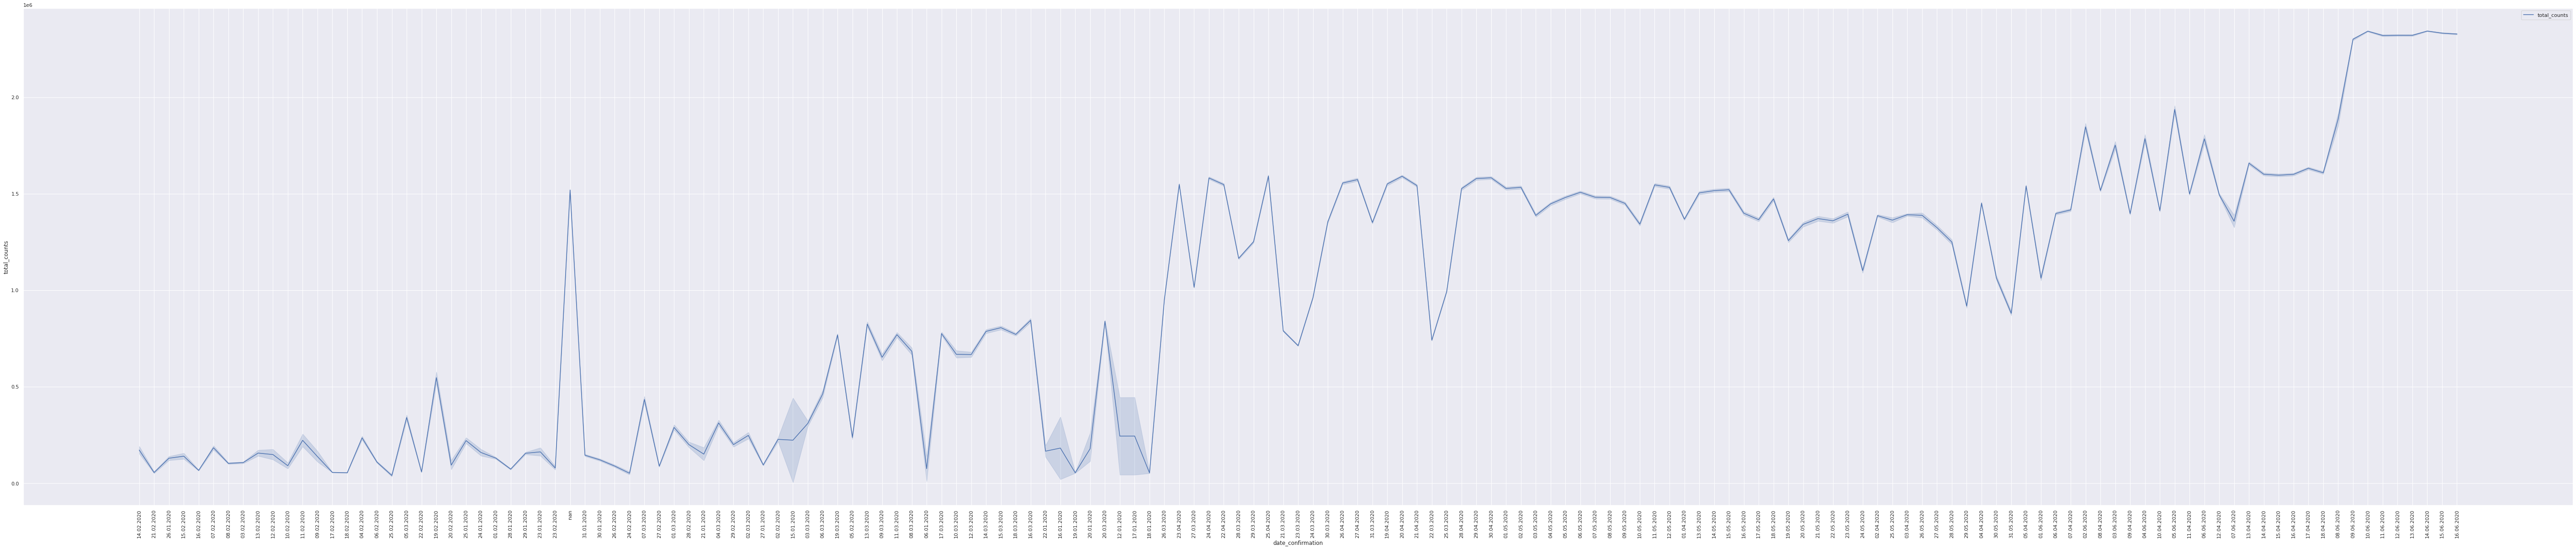

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# data.reset_index(inplace=True);
sns.set()
confirmed_date= data['date_confirmation'].astype(str)

plt.figure(figsize=(100,20))
sns.lineplot(x=confirmed_date,y='total_counts',label='total_counts',data=data)
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [26]:
data

,ID,age,sex,city,province,country,latitude,longitude,date_confirmation,symptoms,lives_in_Wuhan,travel_history_location,date_death_or_discharge,count,total_counts,year,month,day
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,14.02.2020,NaN,NaN,China,NaN,1,1,2020,14,02
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,21.02.2020,NaN,NaN,NaN,22.02.2020,1,2,2020,21,02
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,14.02.2020,NaN,NaN,NaN,17.02.2020,1,3,2020,14,02
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,26.01.2020,NaN,NaN,NaN,NaN,1,4,2020,26,01
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,14.02.2020,NaN,NaN,NaN,NaN,1,5,2020,14,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,17.05.2020,NaN,NaN,NaN,NaN,1,2676307,2020,17,05
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,17.05.2020,NaN,NaN,NaN,NaN,1,2676308,2020,17,05
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,17.05.2020,NaN,NaN,NaN,NaN,1,2676309,2020,17,05
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,17.05.2020,NaN,NaN,NaN,NaN,1,2676310,2020,17,05


In [27]:
# 미국 데이터 추출
case_us = data.groupby('country').get_group('United States')
case_us

,ID,age,sex,city,province,country,latitude,longitude,date_confirmation,symptoms,lives_in_Wuhan,travel_history_location,date_death_or_discharge,count,total_counts,year,month,day
753,000-1-10676,NaN,NaN,Bexar County,Texas,United States,29.448444,-98.520099,13.02.2020,NaN,NaN,China,NaN,1,754,2020,13,02
1399,000-1-11257,NaN,NaN,Sacramento County,California,United States,38.453540,-121.339000,21.02.2020,NaN,NaN,China,NaN,1,1400,2020,21,02
1743,000-1-11567,NaN,NaN,Humboldt County,California,United States,40.703050,-123.873000,20.02.2020,NaN,NaN,NaN,NaN,1,1744,2020,20,02
1999,000-1-11798,NaN,NaN,Snohomish County,Washington,United States,48.048180,-121.696000,07.03.2020,NaN,NaN,NaN,NaN,1,2000,2020,07,03
2000,000-1-11799,30-39,female,Pierce County,Washington,United States,47.023576,-122.102130,07.03.2020,NaN,NaN,NaN,NaN,1,2001,2020,07,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726963,006-9995,NaN,NaN,New York City,New York,United States,40.661000,-73.944000,21.03.2020,NaN,NaN,NaN,NaN,1,726964,2020,21,03
726964,006-9996,NaN,NaN,New York City,New York,United States,40.661000,-73.944000,21.03.2020,NaN,NaN,NaN,NaN,1,726965,2020,21,03
726965,006-9997,NaN,NaN,New York City,New York,United States,40.661000,-73.944000,21.03.2020,NaN,NaN,NaN,NaN,1,726966,2020,21,03
726966,006-9998,NaN,NaN,New York City,New York,United States,40.661000,-73.944000,21.03.2020,NaN,NaN,NaN,NaN,1,726967,2020,21,03


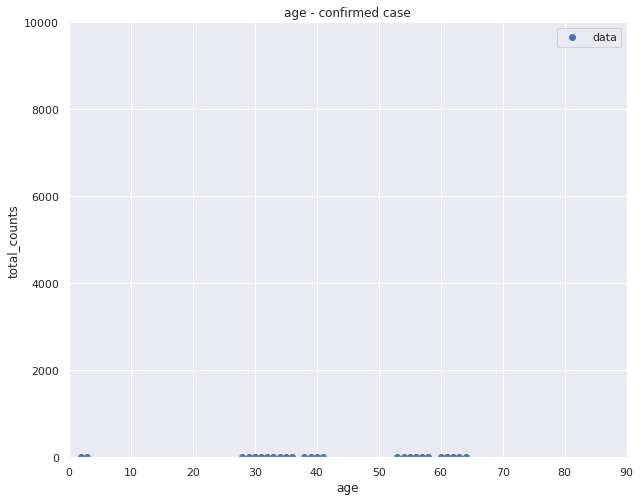

In [49]:

data.age = data.age.str.slice(0,1)

plt.rcParams['figure.figsize']=(10,8)
plt.scatter(data.total_counts, data.age,label = "data")
plt.legend(loc = "best")
plt.xlim([0,90])
plt.ylim([0,10000])
plt.xlabel('age')
plt.ylabel('total_counts')
plt.title('age - confirmed case')
plt.show()

In [ ]:
# 성별 집계
case_sex = data["sex"].value_counts()
case_sex

In [ ]:
#Null 값이 많아서 완전한 정보는 아님
pd.crosstab(data.country,data.sex,margins=True).style.background_gradient(cmap='summer_r') 

In [ ]:
case_country_sex = data.groupby(['sex','country'])
country_sex_count = data.groupby(['sex','country']).sum()
case_country_sex

In [ ]:
country_sex_count.sort_values(by='country',ascending=False).plot.barh(figsize=(5,300))

In [ ]:
# 미국 시별 집계
case_us_city = case_us[['city']]
us_city_count = case_us_city.value_counts()
# case_us_city.iloc[:10,:]
us_city_count.rank(ascending=False)

In [ ]:
us_city_count.sort_values().plot.barh(figsize=(5,300))

In [ ]:
us_city_count[0]

In [ ]:
top_city_count = us_city_count.head(50)
top_city_index = top_city_count.index
top_city_index_df = pd.DataFrame(top_city_index)
top_city_index_df.reset_index(inplace=False,drop=False)

top_city_index = list(list(top_city_index_df[0].tolist()))
top_city_index

In [ ]:
top_city_index_list = []
i=0
for i in range(len(top_city_index)):

  temp = top_city_index[i]
  print(temp[0])

top_city_index_list.append(temp[0])

In [ ]:
# 와..잌..누가 도시 이름 왜 이랭!!
# top_city_count.reset_index(top_city_index_list)

In [ ]:
top_city_count.astype(int).plot(figsize=(15,12))

In [ ]:
# 미국 주별 집계
case_us_province = case_us[['province']]
us_province_count = case_us_province.value_counts()
# case_us_province.iloc[:10,:]
us_province_count.rank(ascending=False)

In [ ]:
data['date_confirmation'].value_counts()

In [ ]:
data['travel_history_location'].value_counts() #.rank(ascending=False)

In [ ]:
data['travel_history_location'].describe()

In [ ]:
data['travel_history_location'].unique()

In [ ]:
travel_history_data = data[data["travel_history_location"].notnull()].copy()
travel_history_data.value_counts()

#### 이하 내용 백업

여행력에서 날짜 index 별도 dataframe으로 만들 예정

사유:
- 아래와 같은 형태로 분리하여 분석 의도 명확
  - 여행한 지역별 빈도수 집계 -> 막대 그래프
  - 각 지역에 대한 여행 빈도수 높은 일자 집계 -> heatmap 사용 예정

- 관련 그래프 아래 "예시 데이터 및 차트" 참고



In [ ]:
# 예시 데이터 및 차트
# sns.set_theme(); np.random.seed(0)
# x = np.random.randn(100)
# ax = sns.distplot(x)
# plt.show()

In [ ]:
# 예시 데이터 및 차트
# uniform_data = np.random.rand(10, 12)
# plt.figure(figsize=(20,15))
# sns.heatmap(uniform_data, annot=True)
# plt.show()

In [ ]:
day_travel_count = travel_history_data.groupby(['date_confirmation','travel_history_location'])['ID'].count()
day_travel_count

In [ ]:
day_travel_count_df=pd.DataFrame(day_travel_count)
day_travel_count_df

In [ ]:
day_travel_count_df.plot(figsize=(100,20)) #-> 표 변경 필요 seaborn 

In [ ]:
day_travel_cumsum = day_travel_count.groupby(level=[1]).cumsum()
day_travel_cumsum

In [ ]:
# 날짜 기준 1차 분류, 여행지 기준 2차 분류 후 해당 지역 방문자 집계
# 데이터량이 많아 .head()로 일부만 출력

day_travel_cumsum_df=pd.DataFrame(day_travel_cumsum)
day_travel_cumsum_df_head = day_travel_cumsum_df.head(100)

In [ ]:
day_travel_cumsum_df_head.plot(figsize=(30,12)) #-> 표 변경 필요 seaborn 



---



---



#### 이하 백업 및 수정 사항

In [ ]:
# 여행력에 나온 모든 국가 및 지역 출력 - 데이터 관찰용
data['travel_history_location'].unique()

In [ ]:
# 데이터 미국 도시 리스트 만들기
# - 이후 데이터 처리시 해당 도시는 모두 United States로 변경할 예정
case_us = data.groupby('country').get_group('United States')
case_us
us_city_list = case_us['city'].unique()
us_city_list

In [ ]:
# 다뤄야할 데이터 ...... df로 변경함
day_travel_count = travel_history_data.groupby('travel_history_location')['ID'].count() # type : pandas.core.series.Series
df_day_travel_count = pd.DataFrame(day_travel_count)
# list_df_day_travel_count = [df_day_travel_count.index]
# list_df_day_travel_count
# df_day_travel_count


In [ ]:
def group_us(list) :
  for i in range(len(list)):
    val = list[i]
    print(val)
    if val in us_city_list:
      val = 'United State'
      print(val)
    else : 
      pass
    i+=1

In [ ]:
# keep -  문제있음

# import re

# def split_data(list):
#   for i in range(len(list)):
#     val = list[i]
#     print("val : ",val)
#     val = val.replace(';', '')
#     val = val.replace(' ', '')
#     print("replace : " , val)
#     split_everyword = val.split(', ')
#     print("split_everyword B : ", split_everyword)
#     if len(split_everyword) > 1 :
#       for j in range(len(split_everyword)):
#         split_val = split_everyword[j]
#         list = split_everyword.append(split_val)
#         print("split_everyword A : ", split_everyword)
#     else :
#       return list
#   print(list)

In [ ]:
# keep -  문제있음

# def replace_data(list):
#   for i in range(len(list)):
#     val = list[i]
#     print("val : ",val)
#     val = val.replace(';', '')
#     val = val.replace(' ', '')
#     val = val.replace(',', '')
#     replace_list = list.append(val)
#     print("replace : " , val)
#   return replace_list; printreplace_list()
#   return replace_list; print(replace_list)

In [ ]:
# 다뤄야할 데이터 ...... 함수 불러와서 테스트
day_travel_count = travel_history_data.groupby('travel_history_location')['ID'].count()
day_travel_count.head(30) # type : pandas.core.series.Series
day_travel_count

### 구분용

In [ ]:
#해보고 싶은것은????

#전세계 - 월별 확진자수 그래프ㄱ
#전세계 - 국가별 확진자수 그래프
#전세계 - 성별 확진자수 그래프 
#전세계 - 확진자 많은/적은 나라 순위
#특정국가별-월별 확진자수 그래프 (막대그래프? 혹은 라인그래프?)
#특정국가별-성별 확진자수 비율 (파이?)
#세계지도에 표기 (산포?)

# 특정 국가 > 특정 도시 > 성별별 / 연령별 확진자수 그래프


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=data['month'],
            y=data['country'],
            orientation='h'))
fig.update_layout(
    title='Confirmed Cases In Each Country',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
)
fig.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(data, locations=data['country'],
                    color=data['date_confirmation'],locationmode='country names', 
                    hover_name=data['country'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

In [ ]:
import folium
import json

m = folium.Map(location=[45.5236, -122.6750])


In [ ]:
bins = list(data['total_counts'].quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(location=[48, -102], zoom_start=3)
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

folium.Choropleth(
    geo_data=state_geo,
    data=data,
    columns=['country', 'total_counts'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Confirmed Cases (%)',
    bins=bins,
    reset=True
).add_to(m)

m

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:
data.info()

In [ ]:
import plotly.express as px
import plotly.offline as py


data.date_confirmation.str.strip()
py.init_notebook_mode(connected=True)
formated_gdf = data.groupby(['date_confirmation', 'country'])['total_counts'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['date_confirmation'] = pd.to_datetime(formated_gdf['date_confirmation'])
formated_gdf['date_confirmation'] = formated_gdf['date_confirmation'].dt.strftime('%m/%d/%Y')
formated_gdf['count'] = formated_gdf['total_counts'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="country", locationmode='country names', 
                     color="total_counts", size='count', hover_name="country", 
                     range_color= [0, max(formated_gdf['total_counts'])+2], 
                     projection="natural earth", animation_frame="date_confirmation", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)